In [1]:
# z5522942
# Yuji Mao
# 9414 assn1

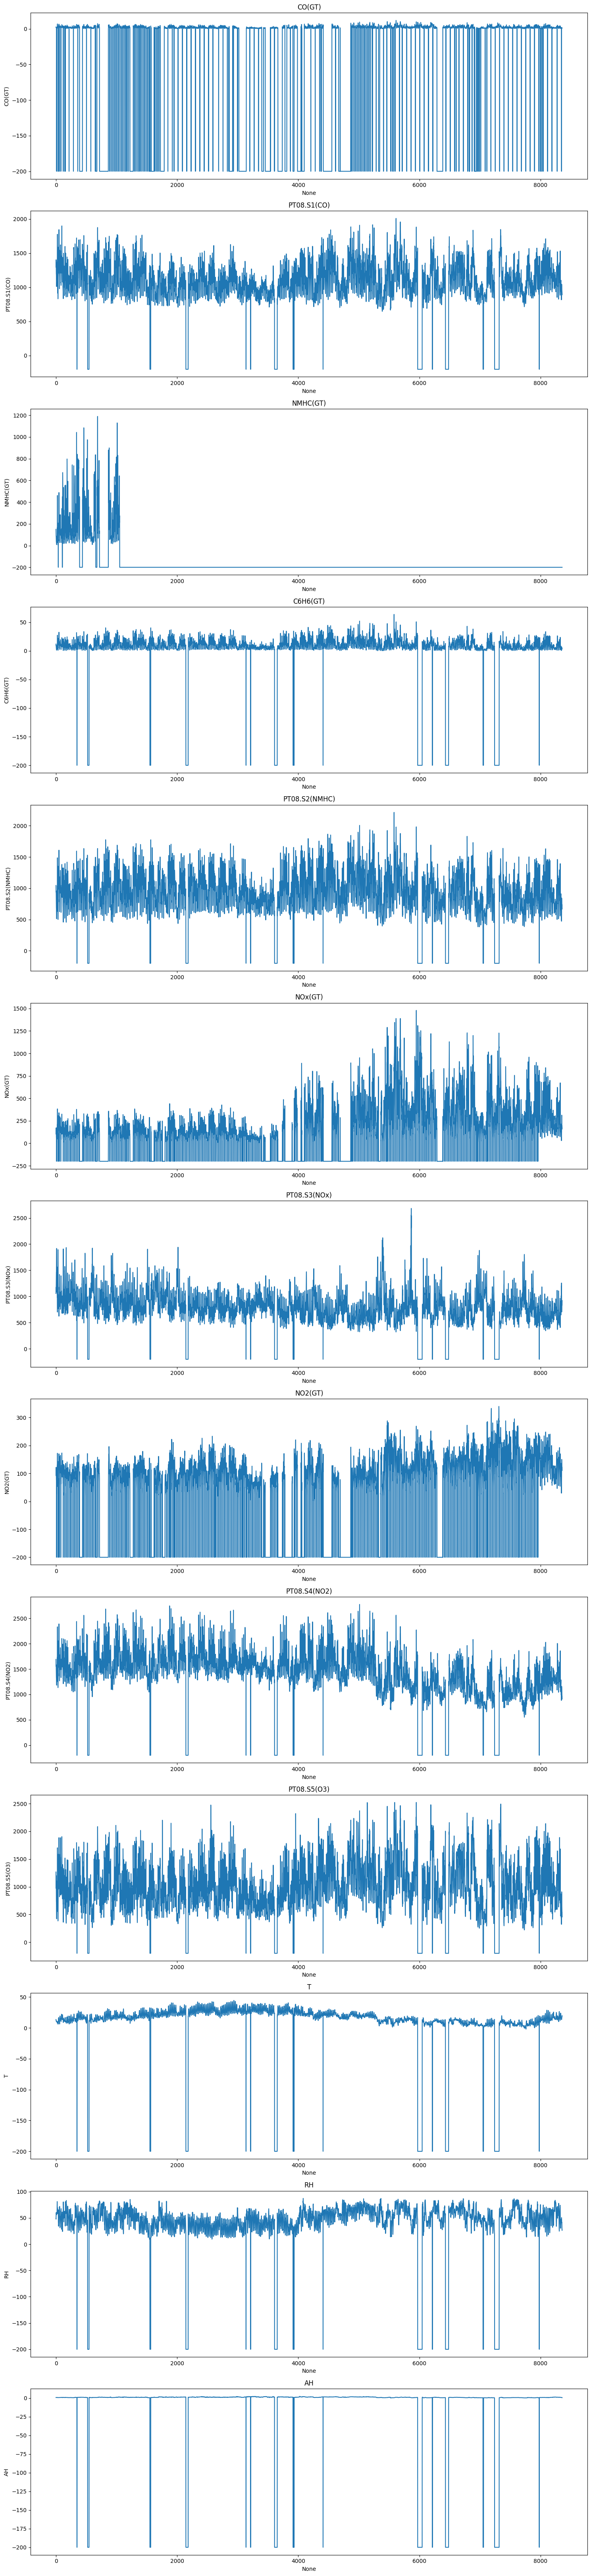

In [2]:
# Data preprocessing

import pandas as pd
import numpy as np

data = pd.read_excel('Desktop/24t2/9414/assn1/AirQualityUCI _ Students.xlsx')

# Identify variation range for input and output variables
variation_range = data.describe()

# Plot each variable
import seaborn as sns
import matplotlib.pyplot as plt

num_col = len(data.columns[2:])

fig, axes = plt.subplots(num_col, 1, figsize=(15, 5*num_col))
for i, col in enumerate(data.columns[2:]):
    sns.lineplot(data=data, x=data.index, y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Correct outliers and missing data
datafill = data.columns[2:]
missing_val = data[datafill] == -200
missing_val_sum = missing_val.sum()

data = data.replace(-200, np.nan)
data[datafill] = data[datafill].interpolate(method='linear', inplace=False)

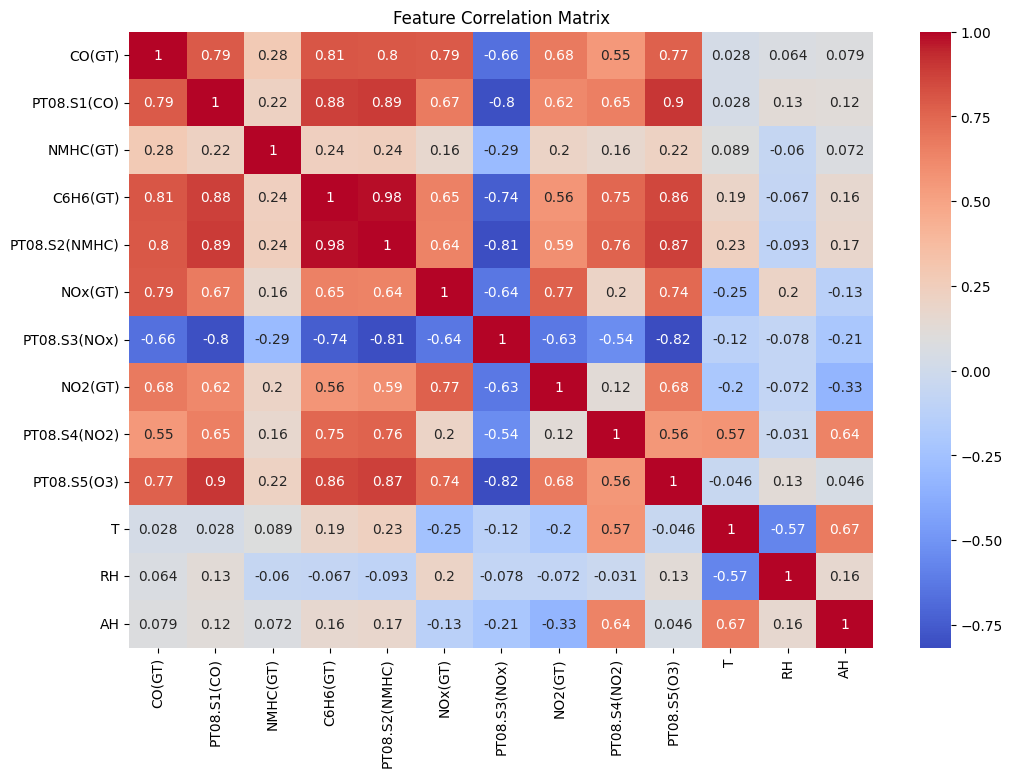

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7059 - loss: 0.5821 - val_accuracy: 0.8517 - val_loss: 0.3589
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8281 - loss: 0.4084 - val_accuracy: 0.8630 - val_loss: 0.3377
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8406 - loss: 0.3847 - val_accuracy: 0.8648 - val_loss: 0.3354
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8396 - loss: 0.3884 - val_accuracy: 0.8654 - val_loss: 0.3317
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8461 - loss: 0.3687 - val_accuracy: 0.8666 - val_loss: 0.3310
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8461 - loss: 0.3710 - val_accuracy: 0.8672 - val_loss: 0.3288
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8526 - loss: 0.3653 - val_accuracy: 0.8702 - val_loss: 0.3258
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8549 - loss: 0

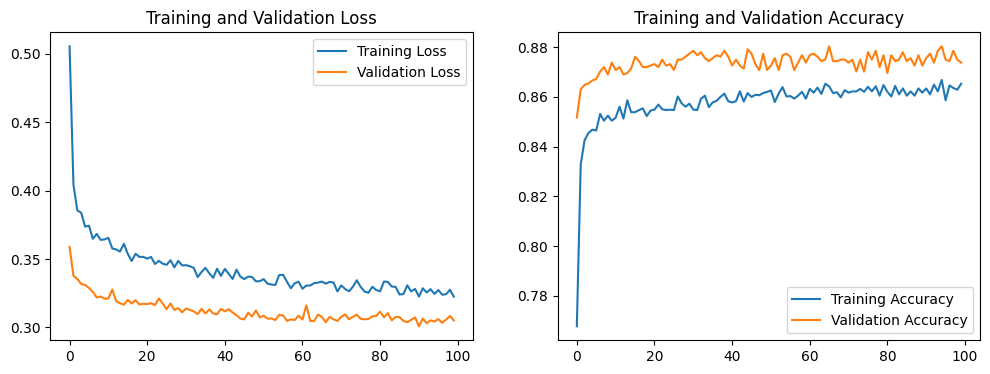

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
Confusion Matrix: 
[[434  43]
 [ 70 289]]
True Positive (TP): 289
True Negative (TN): 434
False Positive (FP): 43
False Negative (FN): 70
Accuracy: 0.8648325358851675
Precision: 0.8704819277108434


In [5]:
# Binary classification based on CO(GT) threshold
threshold = data['CO(GT)'].mean()
data['CO_Target'] = (data['CO(GT)'] > threshold).astype(int)

# Feature correlation
correlation_matrix = data[datafill].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Feature selection
selected_cols = ["NMHC(GT)", "PT08.S4(NO2)", "PT08.S3(NOx)", "T", "RH", "AH", "CO_Target"]
x_class = data[selected_cols].drop(columns='CO_Target')
y_class = data['CO_Target']

# Build classification neural network 
# Normalize data selected
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_class = scaler.fit_transform(x_class)

from sklearn.model_selection import train_test_split

# Split data
x_train_class, x_temp_class, y_train_class, y_temp_class = train_test_split(x_class, y_class, test_size=0.3, random_state=42)
x_val_class, x_test_class, y_val_class, y_test_class = train_test_split(x_temp_class, y_temp_class, test_size=1/3, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define classification model
model_classification = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_class.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
model_classification.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_classification.summary()

# Train
history_class = model_classification.fit(x_train_class, y_train_class, epochs=100, batch_size=32, validation_data=(x_val_class, y_val_class))

# Save training history
hist_class_dataframe = pd.DataFrame(history_class.history)

# Plotting training and validation loss & accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_class_dataframe['loss'], label='Training Loss')
plt.plot(hist_class_dataframe['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_class_dataframe['accuracy'], label='Training Accuracy')
plt.plot(hist_class_dataframe['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Print confusion matrix
y_pred_class = (model_classification.predict(x_test_class) > 0.5).astype(int)
cm_class = confusion_matrix(y_test_class, y_pred_class)

tn, fp, fn, tp = cm_class.ravel()

print(f"Confusion Matrix: \n{cm_class}")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

accuracy_class = accuracy_score(y_test_class, y_pred_class)
precision_class = precision_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy_class}")
print(f"Precision: {precision_class}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 128704.2812 - mean_absolute_error: 261.3350 - val_loss: 38479.6875 - val_mean_absolute_error: 155.2635
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 15187.4922 - mean_absolute_error: 90.3765 - val_loss: 6362.3052 - val_mean_absolute_error: 76.0289
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 9163.2881 - mean_absolute_error: 68.6722 - val_loss: 4605.8662 - val_mean_absolute_error: 64.0126
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 7243.7041 - mean_absolute_error: 59.6962 - val_loss: 3278.4907 - val_mean_absolute_error: 53.4749
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 6938.8750 - mean_absolute_error: 56.9121 - val_loss: 4996.6401 - val_mean_absolute_error: 62.4660
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 5690.9971 - mean_absolute_error: 51.6376 - val_loss: 3235.2856 - val_mean_absolute_error: 53.9790
Epoch 7/100
183/183 ━━━━━━━━

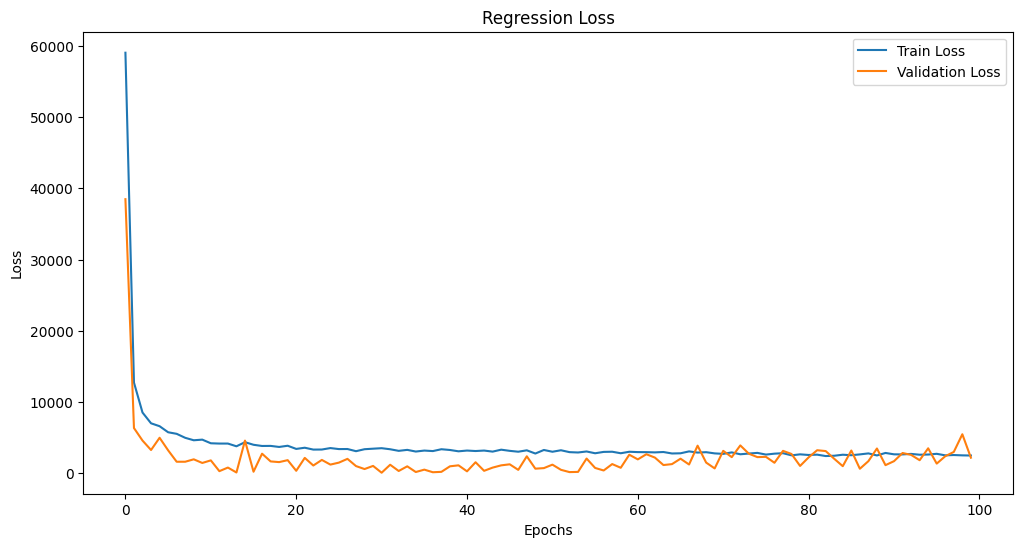

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


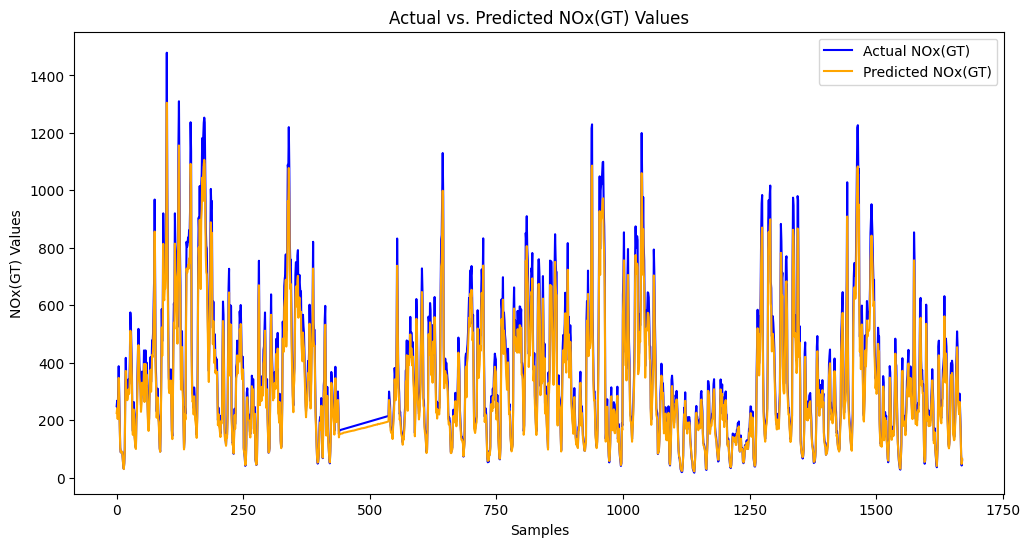

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
Root Mean Squared Error (RMSE): 35.015643198368224
Mean Absolute Error (MAE): 27.672206268401702
Number of Samples: 837


In [4]:
# Data Selection for Regression Model
regression_columns = ["NOx(GT)", "NMHC(GT)", "PT08.S4(NO2)", "PT08.S3(NOx)", "T", "RH", "AH"]
x_reg = data[regression_columns]
y_reg = data['NOx(GT)']

# Split data
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

x_train_reg = x_reg[:train_size]
y_train_reg = y_reg[:train_size]
x_val_reg = x_reg[train_size:train_size + val_size]
y_val_reg = y_reg[train_size:train_size + val_size]
x_test_reg = x_reg[train_size + val_size:]
y_test_reg = y_reg[train_size + val_size:]

# Define Regression model
model_regression = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_reg.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model_regression.summary()

# Compile
model_regression.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train
history_reg = model_regression.fit(x_train_reg, y_train_reg, epochs=100, batch_size=32, validation_data=(x_val_reg, y_val_reg))

# Plot training & validation loss for regression model
plt.figure(figsize=(12, 6))
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot network outputs vs. actual NOx(GT) values for validation set
y_val_pred_reg = model_regression.predict(x_val_reg)

plt.figure(figsize=(12, 6))
plt.plot(y_val_reg.values, label='Actual NOx(GT)', color='blue')
plt.plot(y_val_pred_reg, label='Predicted NOx(GT)', color='orange')
plt.title('Actual vs. Predicted NOx(GT) Values')
plt.xlabel('Samples')
plt.ylabel('NOx(GT) Values')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Print performance metrics
rmse_reg = np.sqrt(mean_squared_error(y_test_reg, model_regression.predict(x_test_reg)))
mae_reg = mean_absolute_error(y_test_reg, model_regression.predict(x_test_reg))

print(f"Root Mean Squared Error (RMSE): {rmse_reg}")
print(f"Mean Absolute Error (MAE): {mae_reg}")
print(f"Number of Samples: {len(y_test_reg)}")
